# Exploratory analysis on the seattle criminal incident data from summer 2014

We look into the following questions for this assignment

- How do incidents vary by time of day? Which incidents are most common in the evening? During what periods of the day are robberies most common?
- For either city, how do incidents vary by neighborhood? Which incidents are most common in the city center? In what areas or neighborhoods are robberies or thefts most common?
- For either city, how do incidents vary month to month in the Summer 2014 dataset?

In [124]:
#first load the libraries necessary for this task
import pandas as pd
import matplotlib.pyplot as plt

In [129]:
plt.rcParams.update({'figure.max_open_warning': 0})

In [126]:
#Read the seattle incident summer file
seattle_incidents = pd.read_csv('seattle_incidents_summer_2014.csv', low_memory=False)
seattle_incidents.head()

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
0,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,06/28/2015 10:31:00 AM,06/28/2014 10:31:00 AM,06/28/2015 10:31:00 AM,6XX BLOCK OF NW 74 ST,J,J2,2900.3013,-122.364672,47.682524,"(47.68252427, -122.364671996)",6,2014
1,481252,2015213067,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,06/24/2015 11:09:00 AM,06/01/2014 12:00:00 AM,06/24/2015 11:09:00 AM,23XX BLOCK OF 43 AV E,C,C2,6300.1004,-122.277080,47.639901,"(47.639900761, -122.277080248)",6,2014
2,481375,2015210301,2316,0,THEFT-MAIL,2300,MAIL THEFT,06/22/2015 09:22:00 AM,08/31/2014 09:00:00 AM,NaN,81XX BLOCK OF 11 AV SW,F,F3,11300.5013,-122.349312,47.529232,"(47.529232299, -122.349312181)",8,2014
3,481690,2015209327,2599,0,COUNTERFEIT,2500,COUNTERFEIT,06/21/2015 03:52:00 PM,06/20/2014 01:38:00 PM,NaN,6XX BLOCK OF PINE ST,M,M2,8200.1002,-122.334818,47.612368,"(47.612368448, -122.334817763)",6,2014
4,478198,2015207880,2399,3,THEFT-OTH,2300,OTHER PROPERTY,06/20/2015 11:59:00 AM,06/01/2014 11:59:00 AM,11/01/2014 12:00:00 PM,77XX BLOCK OF SUNNYSIDE AV N,J,J3,2700.2015,-122.329379,47.685960,"(47.685959879, -122.329378505)",6,2014


## Here we plot a bar graph which shows number of crimes in summer month june-Aug 

In [459]:
def bar_plot(var,title):
    
    """
    :param var: dataframe that is used to plot bar graph
    :param title: string that is the title for the plot
    
    """
    fig,ax = plt.subplots(1)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    var.plot(kind="bar",color='#e4420a',figsize=(7,2));
    plt.title(title); 
#     fig.savefig('graph5/'+title+'.png', bbox_inches = 'tight')

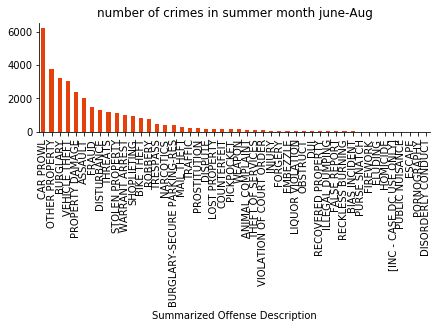

In [256]:
no_of_incidents_by_type = seattle_incidents.groupby(['Summarized Offense Description']).count()['RMS CDW ID'].sort_values(ascending=False)
bar_plot(no_of_incidents_by_type,'number of crimes in summer month june-Aug');

As you can see from above graph that CAR PROWL is most common in Seattle during summer.

Next, we extracted the hour from the Occurred Date or Date Range Start column

In [127]:
seattle_incidents['time'] = pd.to_datetime(seattle_incidents['Occurred Date or Date Range Start'], unit='ns')

In [128]:
seattle_incidents['hour'] = pd.DatetimeIndex(seattle_incidents['time']).hour

## Plot the number of crimes vs hours per incident type

In [437]:
def bar_graph(df_list,title):

    """
    :param df_list: dataframe list that is used to plot bar graph
    :param title: list of crimes that is used as title for the plot
    
    """
    nrow=12
    ncol=4

    fig, axes = plt.subplots(nrow, ncol,)

    count = 0
    for r in range(nrow):    
        for c in range(ncol):
            df_list[count].plot(ax=axes[r,c],kind="bar",color='#e4420a',figsize=(15,20))
            axes[r,c].set_title(title[count])
    #         plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)

            plt.tight_layout()
            count=count+1

    fig.text(0.5, 0.0, 'District', ha='center')
    fig.text(0.0, 0.5, 'Number of incident', va='center', rotation='vertical')
    fig.savefig('graph3/incident_per_offense_district.png', bbox_inches = 'tight')

In [356]:
per_hour_incident_list = []
offense_type = seattle_incidents['Summarized Offense Description'].unique().tolist()
for i in seattle_incidents['Summarized Offense Description'].unique():
    per_hour_incident =  seattle_incidents[seattle_incidents['Summarized Offense Description']== i].groupby(['hour']).count()['RMS CDW ID']
    per_hour_incident_list.append(per_hour_incident)

- We can see from the below graphs that bike theft, car prowl crimes increse at night while Fraud, burglary, threats, stolen property, shoflifting crimes are also common in day time.
- We can also see that robberies are most common during night time.

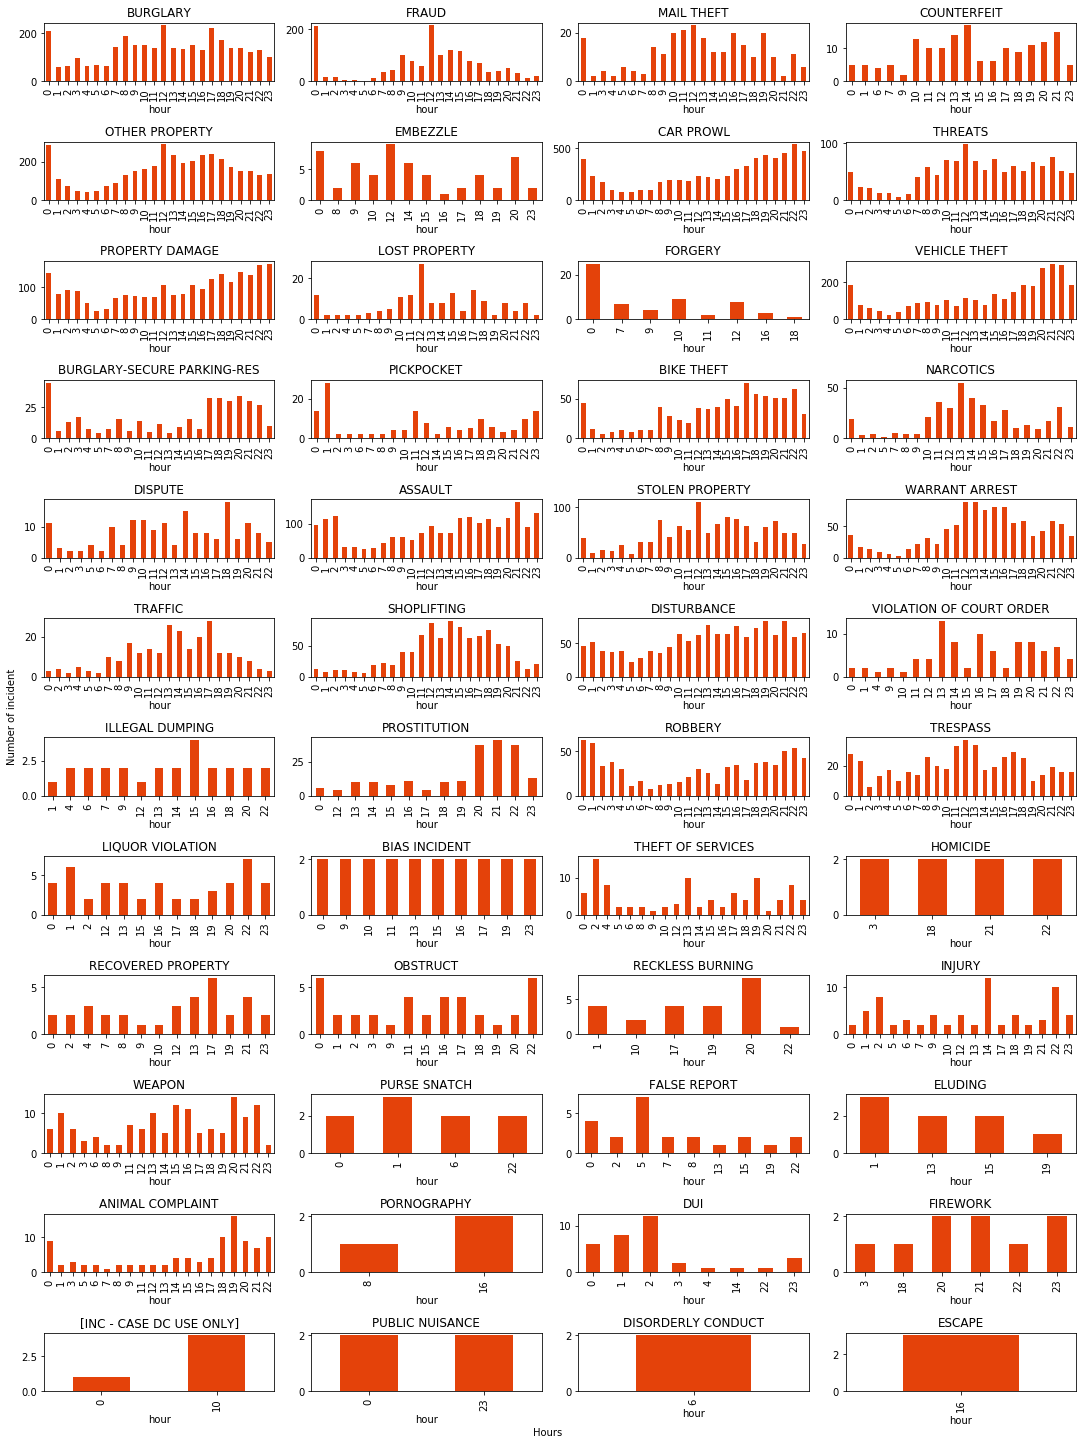

In [368]:
bar_graph(per_hour_incident_list,offense_type)

In [365]:
# for i in seattle_incidents['Summarized Offense Description'].unique():
#     per_hour_incident =  seattle_incidents[seattle_incidents['Summarized Offense Description']== i].groupby(['hour']).count()['RMS CDW ID']
#     bar_plot(per_hour_incident,i)

## Plot the number of crimes vs hours

- In below graph we can see that most crimes occurs during 12 AM

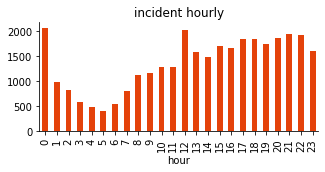

In [264]:
incident_hourly = seattle_incidents.groupby(['hour']).count()['RMS CDW ID']
bar_plot(incident_hourly,'incident hourly')

## Plot number of crimes vs district per cime type

In [376]:
incident_per_offense_district_list = []
for i in seattle_incidents['Summarized Offense Description'].unique():
    incident_per_offense_district = seattle_incidents[seattle_incidents['Summarized Offense Description']== i].groupby(['District/Sector']).count()['RMS CDW ID']
    incident_per_offense_district_list.append(incident_per_offense_district)

 This graph shows that in
 - K district, crimes like Narcotics, Assault, Robbery, Threats, are most common.
 - L district, crimes like Bulgary, Fraud, Vehical theft, are most common.
 - M district, crime like Car prowl, shoft lifting are common.

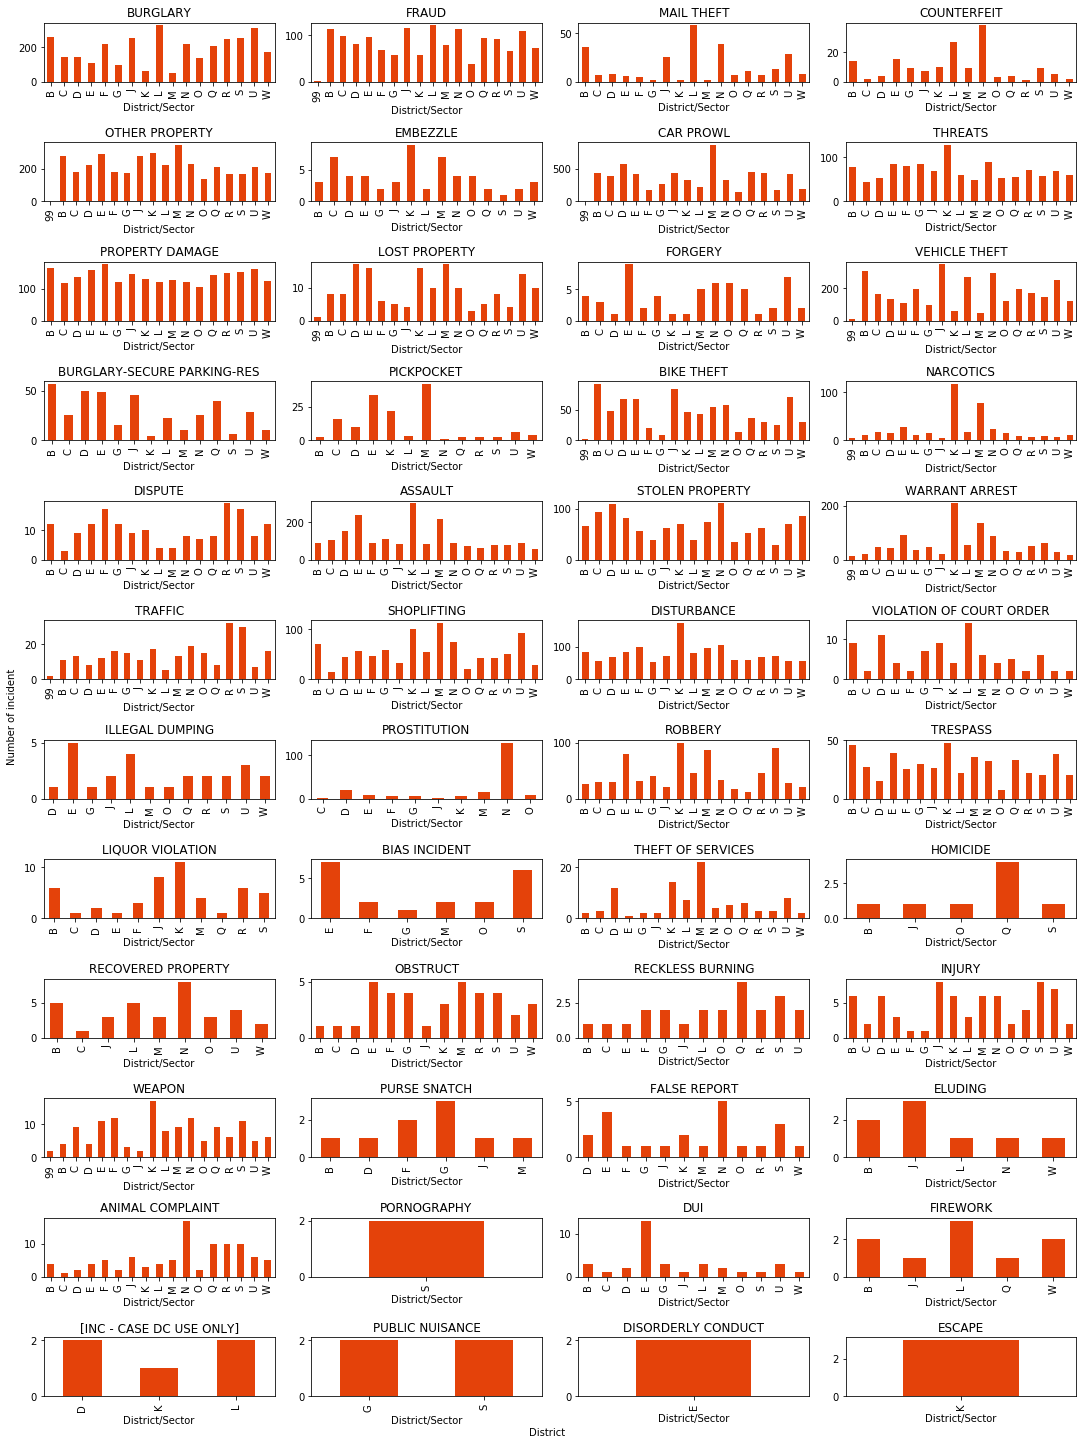

In [408]:
bar_graph(incident_per_offense_district_list,offense_type)

## Plot number of crimes vs district

- This graph shows that M district had maximum number of crimes during summer.

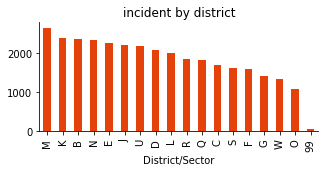

In [265]:
incident_by_district = seattle_incidents.groupby(['District/Sector']).count()['RMS CDW ID'].sort_values(ascending=False)
bar_plot(incident_by_district,'incident by district')

## Plot number of crimes vs crime type per district

In [378]:
incident_per_district_list = []
District = seattle_incidents['District/Sector'].unique().tolist()
for i in range(0,len(District)-1):
    incident_per_district = seattle_incidents[seattle_incidents['District/Sector']== District[i]].groupby(['Summarized Offense Description']).count()['RMS CDW ID']
    incident_per_district_list.append(incident_per_district)

This graph shows that
- Highest crime in most district is Car prowl

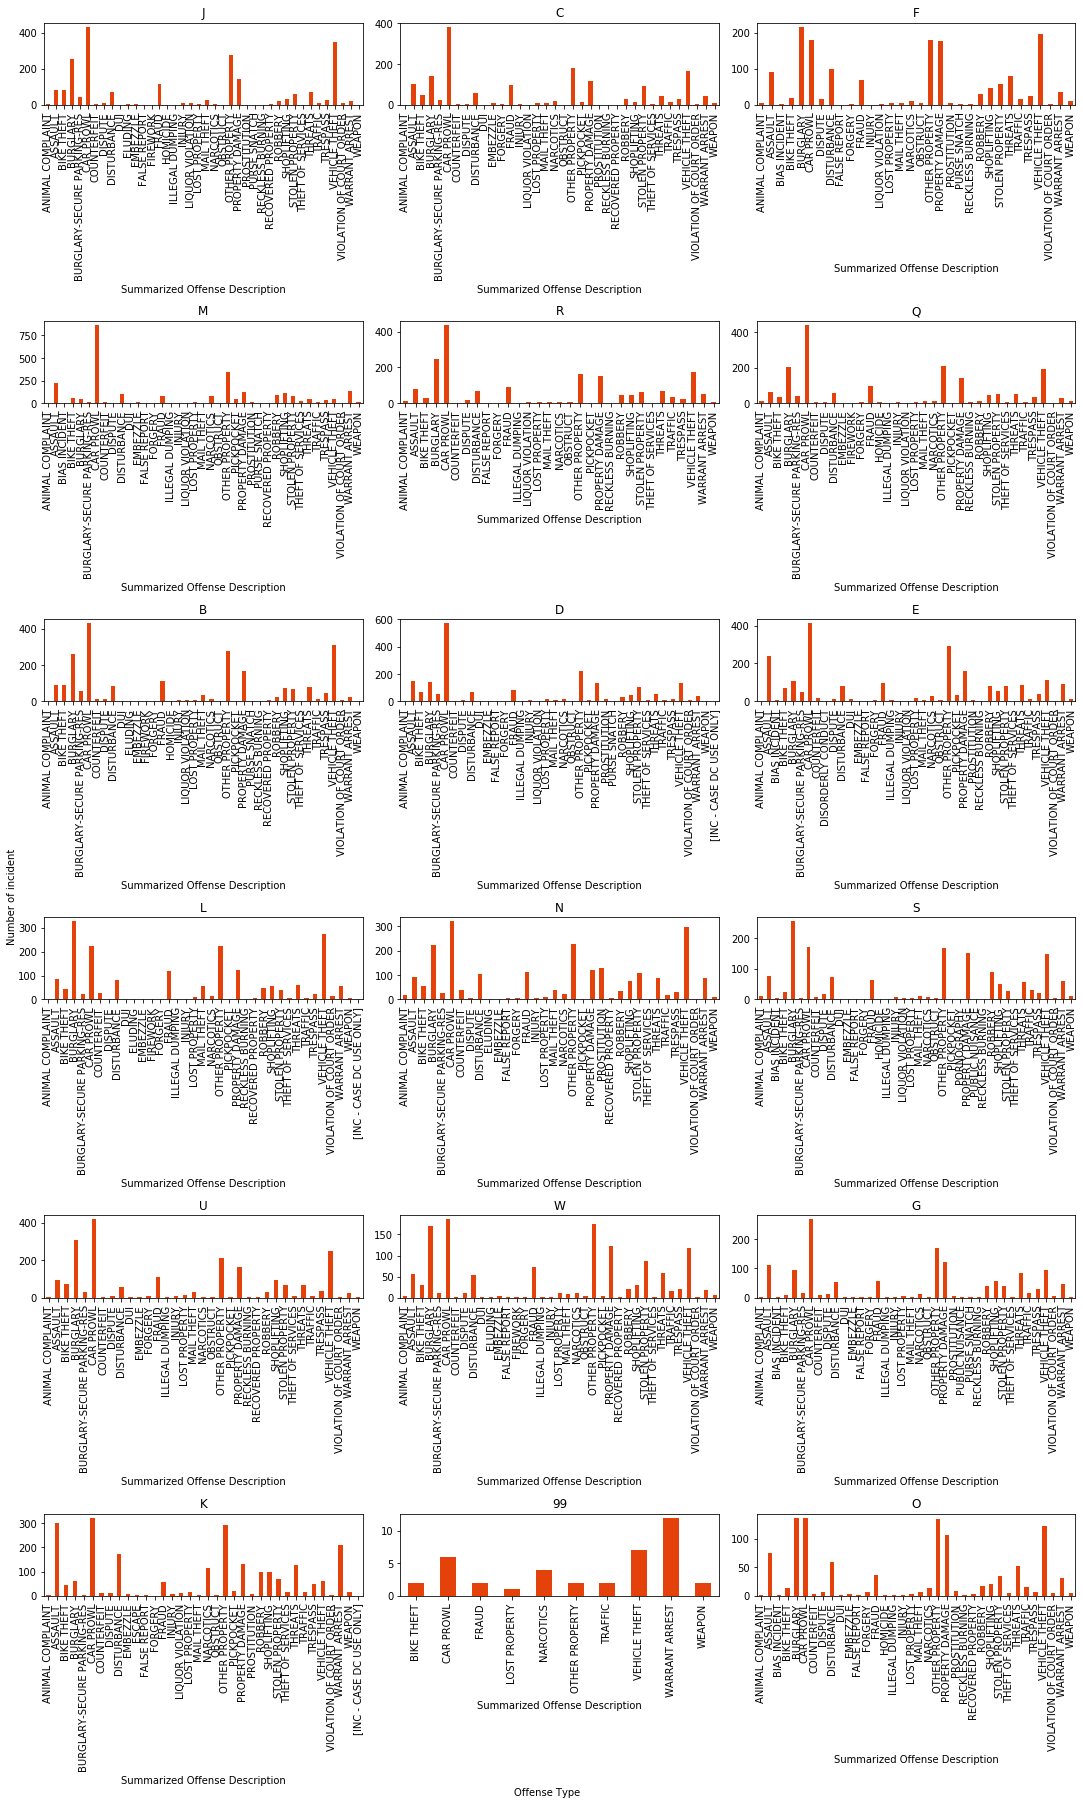

In [405]:
bar_graph(incident_per_district_list,District[0:-1])

## Plot number of crimes vs summer months

In [208]:
incidents_per_month = seattle_incidents.groupby(['Month']).count()['RMS CDW ID']
incidents_per_month

Month
6    11125
7    11154
8    10500
Name: RMS CDW ID, dtype: int64

- This graph shows that July has maximum number of crime. 

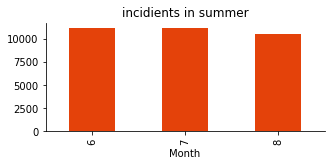

In [266]:
bar_plot(incidents_per_month,'incidients in summer')

##  Plot number of crimes vs crime type in summer month from june to aug

- Car prowl is most common during summer.

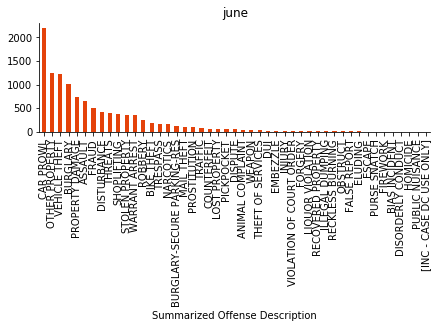

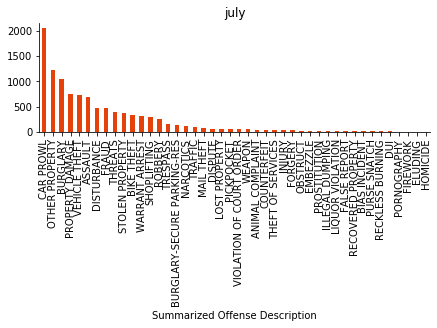

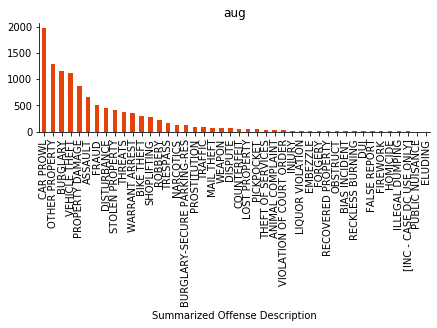

In [460]:
month_names = ['june','july','aug']
months = seattle_incidents['Month'].unique()
for i in range(0,len(months)):
    
    incident_month = seattle_incidents[seattle_incidents['Month']== months[i]].groupby(['Summarized Offense Description']).count()['RMS CDW ID'].sort_values(ascending=False)
    bar_plot(incident_month,month_names[i])

In [433]:
def line_graph(df_list,title):

    """
    :param df_list: dataframe list that is used to plot bar graph
    :param title: list of crimes that is used as title for the plot
    
    """
    nrow=12
    ncol=4

    fig, axes = plt.subplots(nrow, ncol,)

    count = 0
    for r in range(nrow):    
        for c in range(ncol):
            df_list[count].plot(ax=axes[r,c],kind="line",color='#e4420a',figsize=(15,20))
            axes[r,c].set_title(title[count])
    #         plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)

            plt.tight_layout()
            count=count+1

    fig.text(0.5, 0.0, 'Offense Type', ha='center')
    fig.text(0.0, 0.5, 'Number of incident', va='center', rotation='vertical')
    fig.savefig('graph3/iincident_vs_month_per_crime.png', bbox_inches = 'tight')

##  Plot number of crime vs hours per crime type

- Frogery, Bike theft, Injury, Purse snatch increases during summer.
- Vehicle theft, Narcotics, decreases during summer.

In [434]:
incident_month_list = []
for i in seattle_incidents['Summarized Offense Description'].unique():
    incident_month = seattle_incidents[seattle_incidents['Summarized Offense Description']== i].groupby(['Month']).count()['RMS CDW ID']
    incident_month_list.append(incident_month)

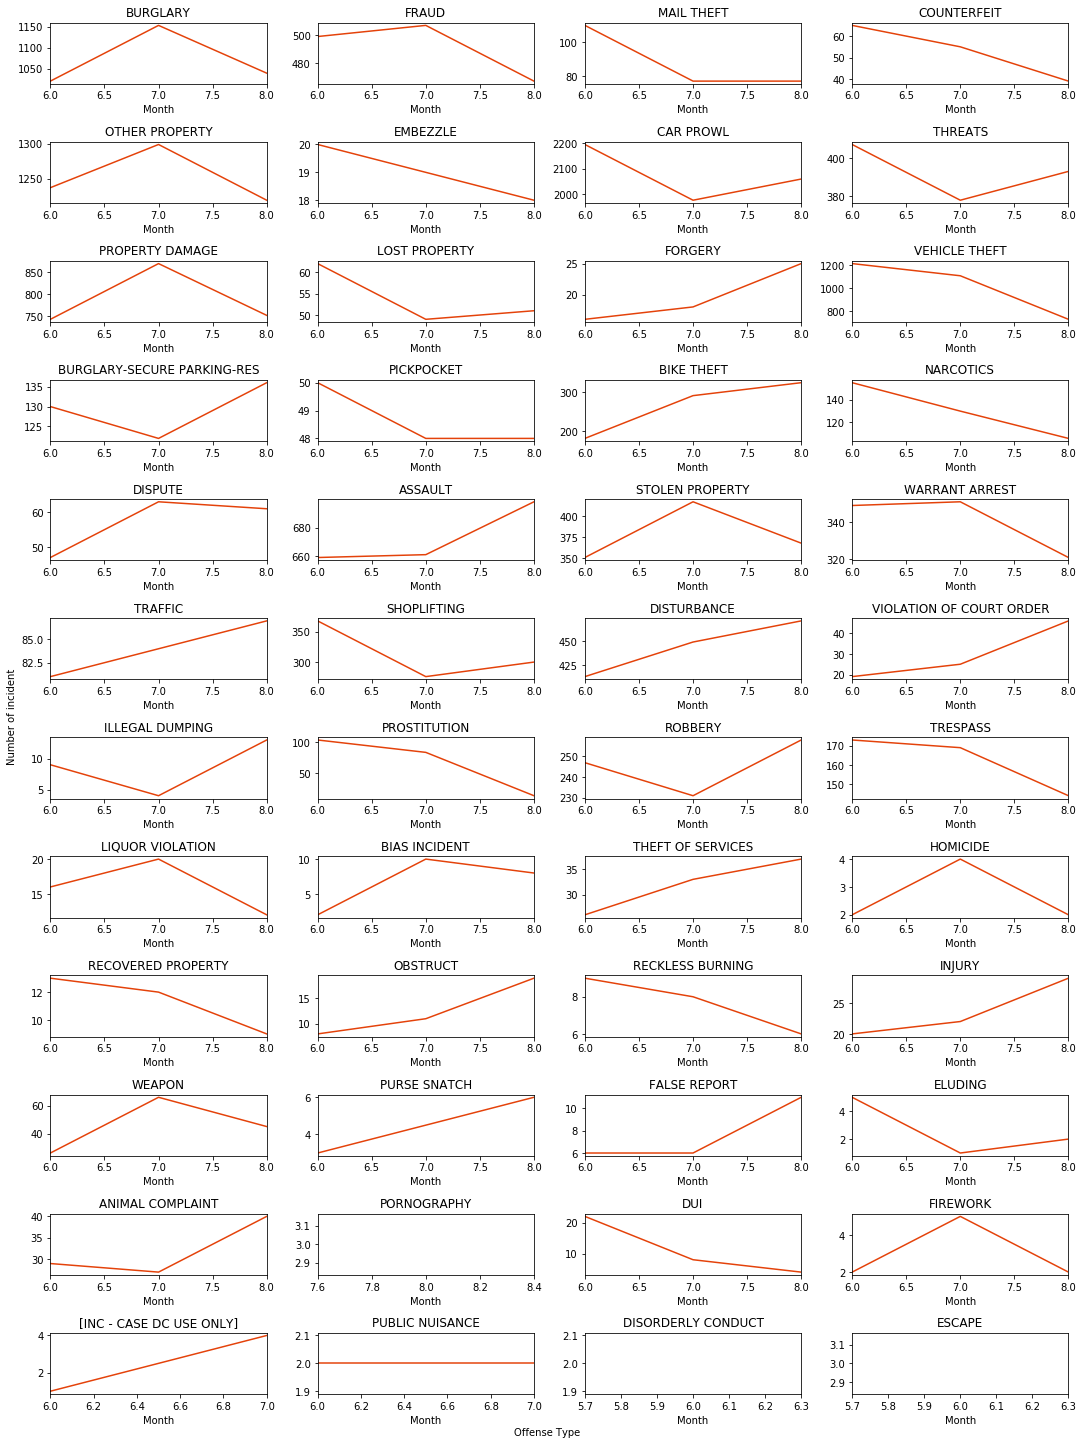

In [436]:
line_graph(incident_month_list,offense_type)